In [1]:
import os
import numpy as np
import matplotlib.image as image
import matplotlib.pyplot as plt
import PIL.Image as Image
import shutil

In [2]:
data_dir = "../datasets/diffraction-patterns-secondary-before"

In [3]:
new_data_dir = "../datasets/patterns-secondary"

120096 2058
29669 2049
119144 2026
120096 3207
183591 2016
259294 2008
259295 2252
259296 2055
35937 2002
35939 2060
35940 2050
35941 2175
35942 2123
35943 2142
35944 2151
35945 2165
35946 2152
35947 2170
35948 2106
35949 2132
35950 2112


C:\Users\joe\AppData\Local\Temp\ipykernel_18224\2565755610.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  f, axarrs = plt.subplots(1, 3)


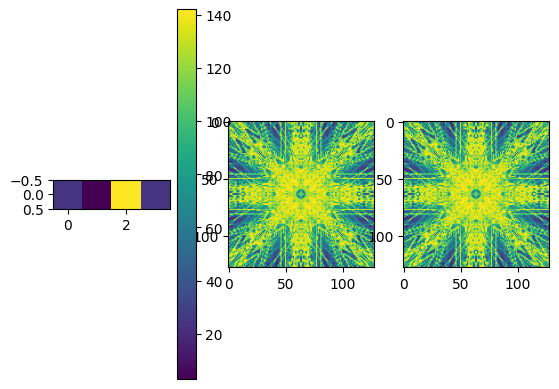

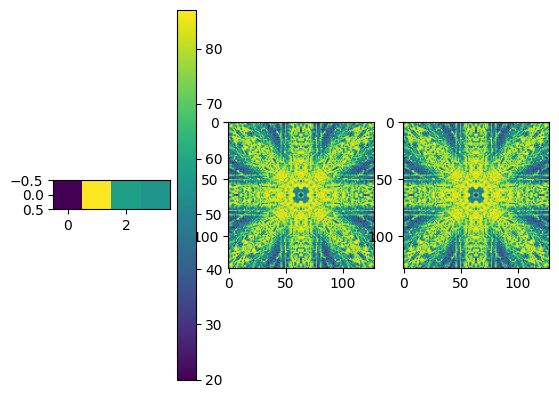

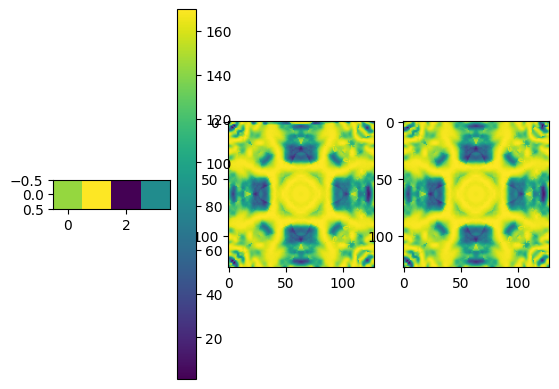

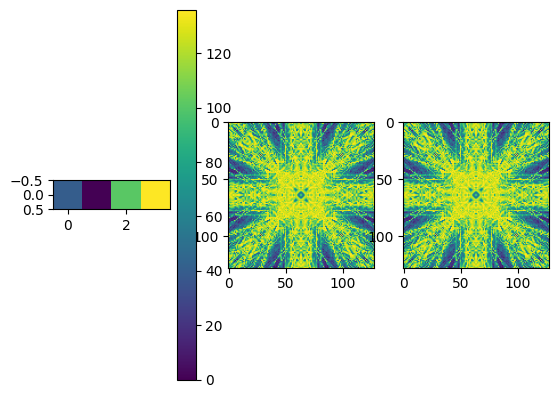

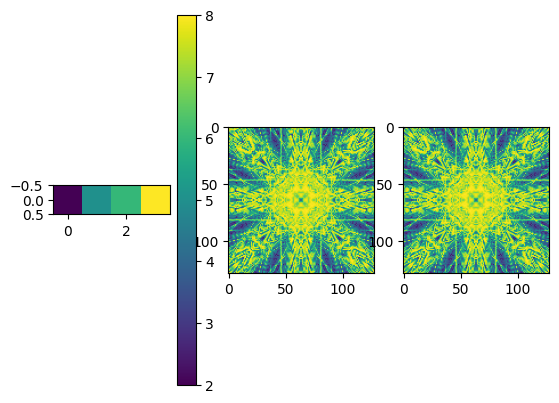

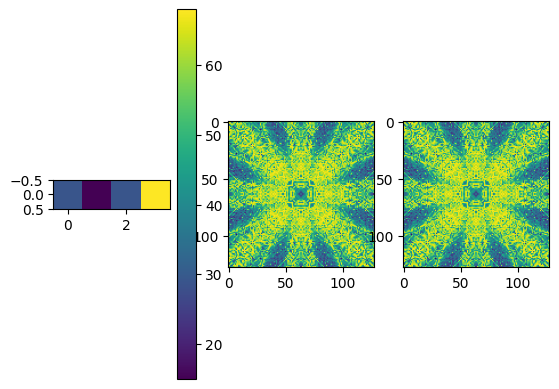

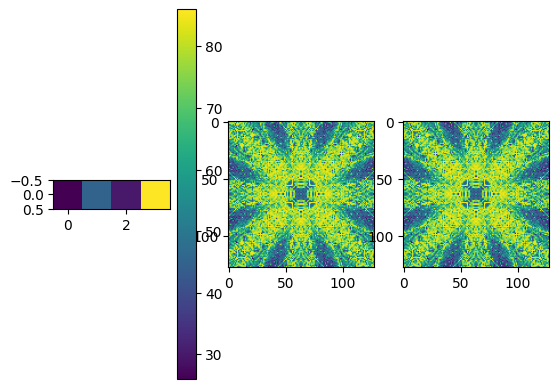

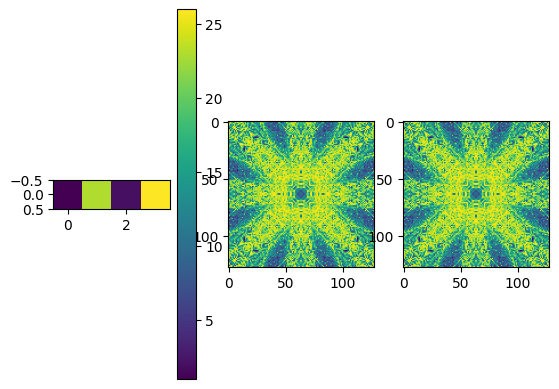

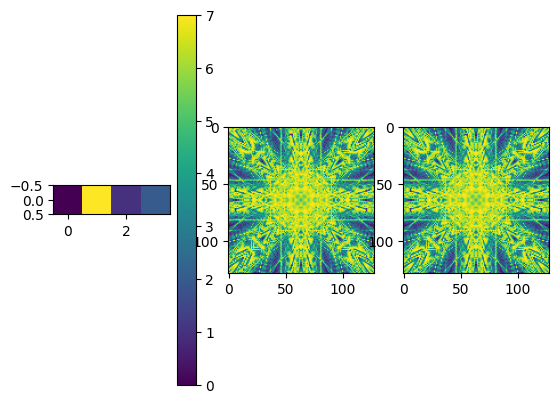

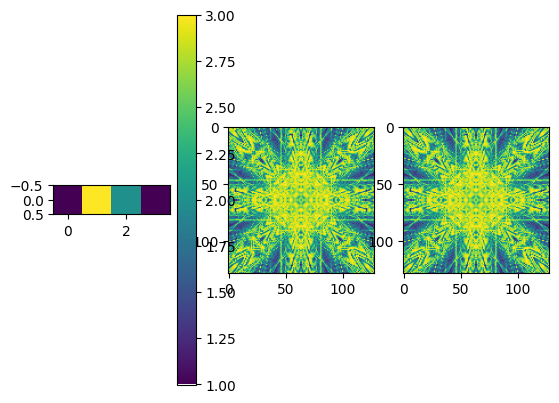

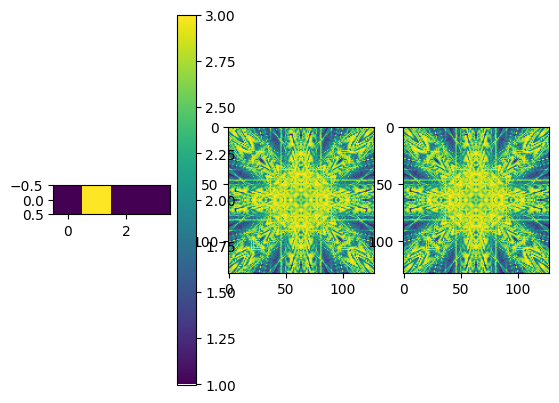

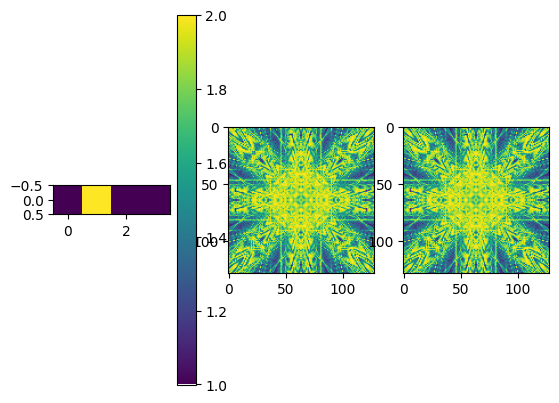

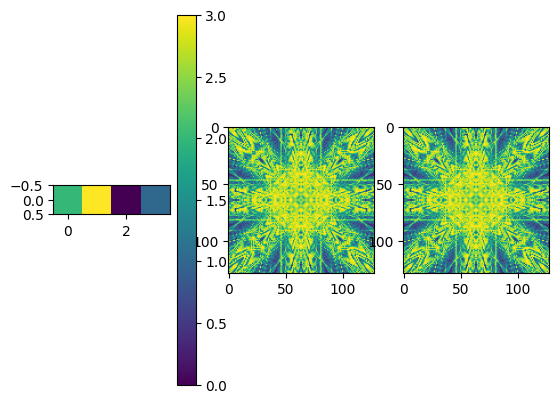

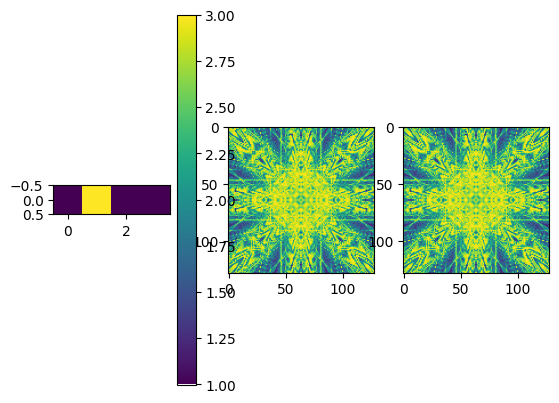

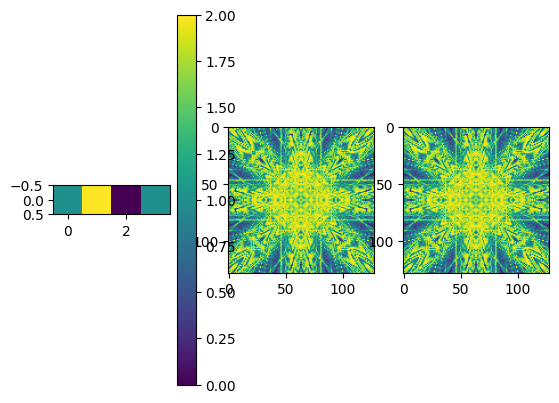

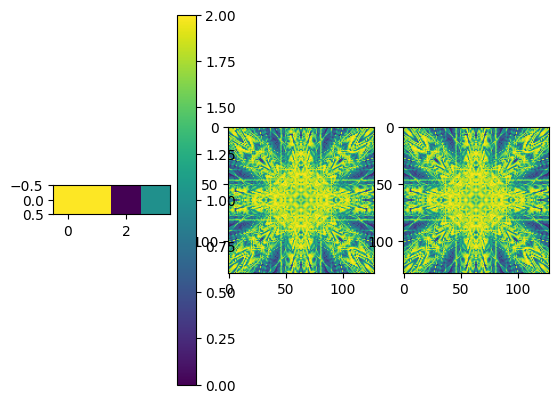

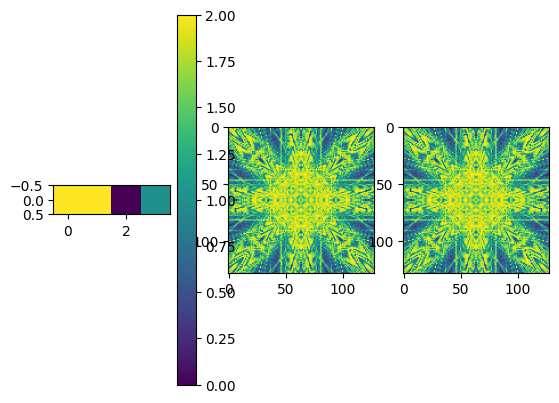

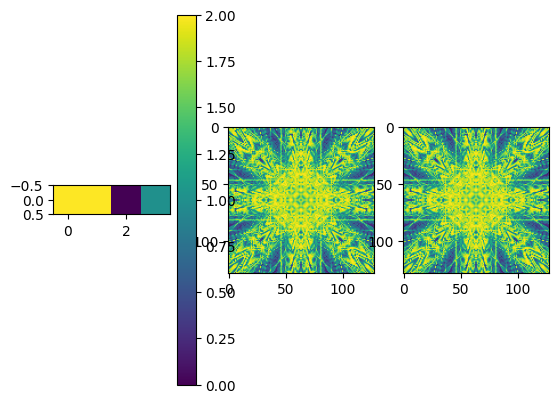

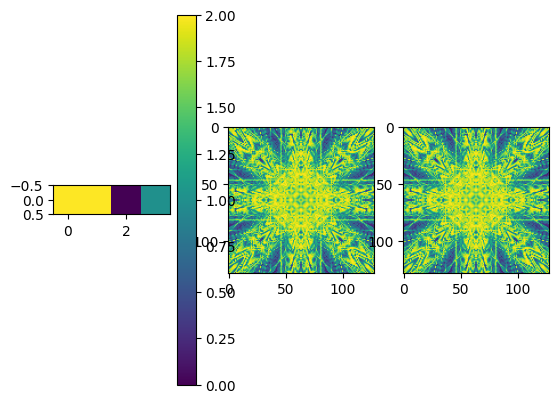

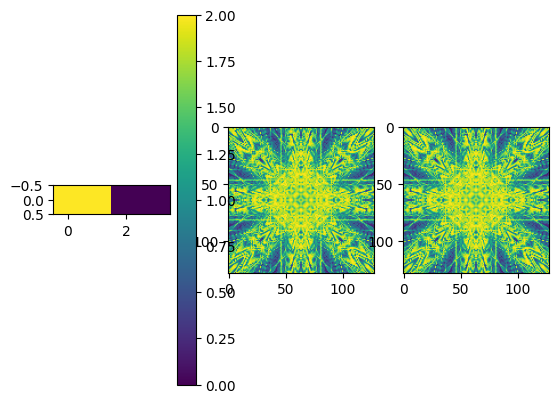

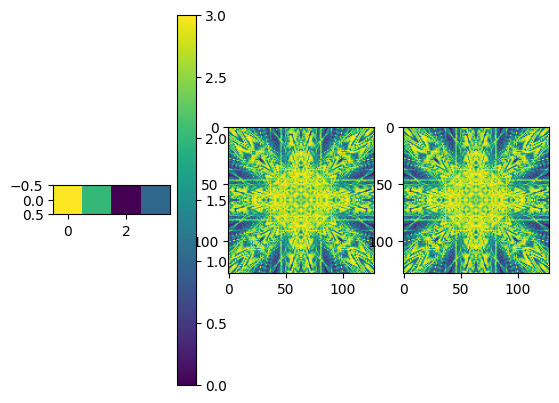

In [4]:
i = 0

for width in ("500", "1000", "1500", "2000"):
    new_width = width.zfill(4)
    
    for code in os.listdir(os.path.join(data_dir, width)):
        # if width == "500":
        #     os.makedirs(os.path.join(new_data_dir, code), exist_ok=True)
            
        #     shutil.copyfile(
        #         os.path.join(data_dir, width, code, "charge_density.png"),
        #         os.path.join(new_data_dir, code, "potential.png")
        #     )
        
        diffraction_pattern = np.asarray(Image.open(os.path.join(data_dir, width, code, "diffraction_pattern.png")))[:, :, 0]
        bottom = diffraction_pattern[5:, :].astype(int)
        top = np.flip(bottom[-5:, :]).astype(int)
        
        new = np.vstack([top, bottom])
        
        # image.imsave(
        #     os.path.join(new_data_dir, code, f"pattern_{new_width}.png"),
        #     new,
        #     cmap="binary_r",
        # )
    
        difference = np.abs(new[4, 2:-2] - diffraction_pattern[4, 2:-2])
        difference = difference[np.newaxis, :]
        loss = np.sum(difference)
        
        if loss > 2000:
            print(code, loss)
            f, axarrs = plt.subplots(1, 3)
            imsh1 = axarrs[0].imshow(difference[:, :4])
            imsh2 = axarrs[1].imshow(diffraction_pattern)
            imsh3 = axarrs[2].imshow(new)
            f.colorbar(imsh1)
        
        